<a href="https://colab.research.google.com/github/NiloferMubeen/CNN/blob/main/cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

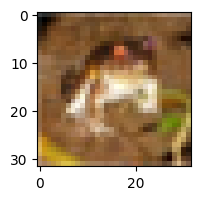

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

In [10]:
def plot_sample(X,y,index):
  plt.figure(figsize=(2,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

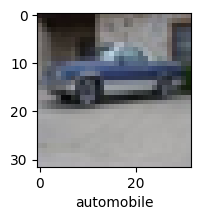

In [14]:
plot_sample(X_train,y_train,10000)

In [15]:
# normalize the values
X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
# Using ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3128 - loss: 1.9255
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4213 - loss: 1.6376
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4503 - loss: 1.5480
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4707 - loss: 1.4996
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4958 - loss: 1.4283


In [18]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4732 - loss: 1.5073


[1.5094751119613647, 0.46799999475479126]

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.69      0.53      1000
           1       0.54      0.64      0.59      1000
           2       0.44      0.21      0.28      1000
           3       0.36      0.37      0.36      1000
           4       0.41      0.46      0.43      1000
           5       0.52      0.25      0.34      1000
           6       0.56      0.50      0.53      1000
           7       0.56      0.52      0.54      1000
           8       0.80      0.33      0.46      1000
           9       0.38      0.72      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



# CNN

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3817 - loss: 1.6944
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5958 - loss: 1.1482
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6560 - loss: 0.9909
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6818 - loss: 0.9126
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7111 - loss: 0.8329
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7277 - loss: 0.7752
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 0.7248
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7662 - loss: 0.6749
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7788 - loss: 0.6276
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7898 - loss: 0.5971


In [26]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7043 - loss: 0.9177


[0.9320822358131409, 0.6976000070571899]

In [27]:
y_test = y_test.reshape(-1,)

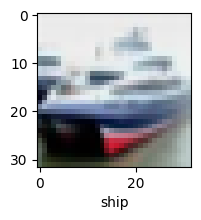

In [28]:
plot_sample(X_test,y_test,1)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.94597489e-03, 2.95246049e-04, 3.74259223e-04, 9.37643707e-01,
        2.98057287e-03, 5.19612208e-02, 2.96827313e-03, 2.87432718e-04,
        7.47145910e-04, 7.96031614e-04],
       [4.28812392e-03, 3.28114554e-02, 2.21457976e-05, 5.26811027e-06,
        1.52683981e-07, 3.46850413e-07, 1.62107881e-07, 2.68143214e-08,
        9.62659836e-01, 2.12559607e-04],
       [9.66296718e-02, 3.57210897e-02, 1.27904688e-03, 3.74925602e-03,
        1.16194580e-02, 4.63949051e-03, 1.41420183e-04, 6.70706900e-03,
        8.22162747e-01, 1.73507147e-02],
       [9.75135505e-01, 8.37805273e-05, 1.36855980e-02, 3.31438059e-04,
        1.48328964e-03, 6.36233599e-05, 1.06595115e-04, 7.10275935e-06,
        9.09647159e-03, 6.72795886e-06],
       [5.38278698e-07, 1.48694156e-07, 1.13152349e-02, 3.62685397e-02,
        4.07210618e-01, 5.09524625e-03, 5.40102661e-01, 2.07121479e-06,
        4.85656301e-06, 1.33651227e-07]], dtype=float32)

In [30]:
np.argmax([5,12,1,2])  # index of 12 is 1

1

In [31]:
y_classes = [np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [33]:
print("Classification report: \n",classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.79      0.85      0.82      1000
           2       0.62      0.60      0.61      1000
           3       0.49      0.55      0.52      1000
           4       0.72      0.52      0.60      1000
           5       0.62      0.56      0.59      1000
           6       0.79      0.77      0.78      1000
           7       0.71      0.78      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.76      0.79      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

